In [47]:
import pandas as pd
df = pd.read_parquet('acl-publication-info.74k.v2.parquet')

In [48]:
df

,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,doi,number,volume,journal,editor,isbn,ENTRYTYPE,ID,language,note
0,O02-2002,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...,18022704,0b09178ac8d17a92f16140365363d8df88c757d0,14,https://aclanthology.org/O02-2002,None,None,2002,...,None,None,None,None,None,None,inproceedings,chen-you-2002-study,None,None
1,L02-1310,None,None,8220988,8d5e31610bc82c2abc86bc20ceba684c97e66024,93,http://www.lrec-conf.org/proceedings/lrec2002/...,European Language Resources Association (ELRA),"Las Palmas, Canary Islands - Spain",2002,...,None,None,None,None,None,None,inproceedings,mihalcea-2002-bootstrapping,None,None
2,R13-1042,Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...,16703040,3eb736b17a5acb583b9a9bd99837427753632cdb,10,https://aclanthology.org/R13-1042,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,jamison-gurevych-2013-headerless,None,None
3,W05-0819,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al...",1215281,b20450f67116e59d1348fc472cfc09f96e348f55,15,https://aclanthology.org/W05-0819,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,aswani-gaizauskas-2005-aligning,None,None
4,L02-1309,None,None,18078432,011e943b64a78dadc3440674419821ee080f0de3,12,http://www.lrec-conf.org/proceedings/lrec2002/...,European Language Resources Association (ELRA),"Las Palmas, Canary Islands - Spain",2002,...,None,None,None,None,None,None,inproceedings,suyaga-etal-2002-proposal,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73280,P99-1002,This paper describes recent progress and the a...,This paper describes recent progress and the a...,715160,ab17a01f142124744c6ae425f8a23011366ec3ee,11,https://aclanthology.org/P99-1002,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034680,None,None,None,None,None,inproceedings,furui-1999-automatic,None,None
73281,P00-1009,We present an LFG-DOP parser which uses fragme...,We present an LFG-DOP parser which uses fragme...,1356246,ad005b3fd0c867667118482227e31d9378229751,12,https://aclanthology.org/P00-1009,Association for Computational Linguistics,Hong Kong,2000,...,10.3115/1075218.1075227,None,None,None,None,None,inproceedings,bod-2000-improved,None,None
73282,P99-1056,The processes through which readers evoke ment...,The processes through which readers evoke ment...,7277828,924cf7a4836ebfc20ee094c30e61b949be049fb6,14,https://aclanthology.org/P99-1056,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034745,None,None,None,None,None,inproceedings,lange-content-1999-grapho,None,None
73283,P99-1051,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...,1829043,6b1f6f28ee36de69e8afac39461ee1158cd4d49a,92,https://aclanthology.org/P99-1051,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034740,None,None,None,None,None,inproceedings,lapata-1999-acquiring,None,None


In [49]:
df.columns

Index(['acl_id', 'abstract', 'full_text', 'corpus_paper_id', 'pdf_hash',
       'numcitedby', 'url', 'publisher', 'address', 'year', 'month',
       'booktitle', 'author', 'title', 'pages', 'doi', 'number', 'volume',
       'journal', 'editor', 'isbn', 'ENTRYTYPE', 'ID', 'language', 'note'],
      dtype='object')

In [50]:
df['year'].min(), df['year'].max()

('1952', '2022')

In [51]:
df['booktitle'].value_counts()

booktitle
Proceedings of the 12th Language Resources and Evaluation Conference                                  895
Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing                847
Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics               778
Proceedings of the Tenth International Conference on Language Resources and Evaluation ({LREC}'16)    745
Proceedings of the Ninth International Conference on Language Resources and Evaluation ({LREC}'14)    742
                                                                                                     ... 
{I}nternational {C}onference on {C}omputational {L}inguistics {COLING} 1969: Preprint No. 61            1
{I}nternational {C}onference on {C}omputational {L}inguistics {COLING} 1969: Preprint No. 71            1
{I}nternational {C}onference on {C}omputational {L}inguistics {COLING} 1969: Preprint No. 8             1
Proceedings of the Workshop on the C

In [52]:
df['abstract'].str.split().str.len().mean()

125.53513425645421

In [53]:
df.nlargest(5, 'numcitedby')[['title', 'numcitedby']]

,title,numcitedby
41337,{BERT}: Pre-training of Deep Bidirectional Tra...,37353
53174,{G}lo{V}e: Global Vectors for Word Representation,23467
88,{B}leu: a Method for Automatic Evaluation of M...,17139
3927,Learning Phrase Representations using {RNN} En...,15755
61918,{W}ord{N}et: A Lexical Database for {E}nglish,14182


In [54]:
top_authors = (
    df['author']
    .dropna()  # Drop missing entries first
    .str.split(' and ')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

print(top_authors)


author
Tiedemann, J{\"o}rg    28
S{\o}gaard, Anders     27
Ferret, Olivier        25
Bick, Eckhard          25
Wilks, Yorick          24
Kay, Martin            23
Johnson, Mark          23
Kwong, Oi Yee          23
Grishman, Ralph        23
Somers, Harold         20
Name: count, dtype: int64


In [55]:
df.isna().sum()

acl_id                 0
abstract            5616
full_text           5830
corpus_paper_id        0
pdf_hash            1209
numcitedby             0
url                    0
publisher          10119
address             7192
year                   0
month               7323
booktitle           2041
author               667
title                  0
pages              13807
doi                43607
number             71811
volume             71445
journal            71248
editor             73272
isbn               71915
ENTRYTYPE              0
ID                     0
language           70265
note               73088
dtype: int64

In [62]:
df_clean = df[df['full_text'].notna() & df['abstract'].notna()].reset_index(drop=True)
df_clean

,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,doi,number,volume,journal,editor,isbn,ENTRYTYPE,ID,language,note
0,O02-2002,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...,18022704,0b09178ac8d17a92f16140365363d8df88c757d0,14,https://aclanthology.org/O02-2002,None,None,2002,...,None,None,None,None,None,None,inproceedings,chen-you-2002-study,None,None
1,R13-1042,Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...,16703040,3eb736b17a5acb583b9a9bd99837427753632cdb,10,https://aclanthology.org/R13-1042,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,jamison-gurevych-2013-headerless,None,None
2,W05-0819,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al...",1215281,b20450f67116e59d1348fc472cfc09f96e348f55,15,https://aclanthology.org/W05-0819,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,aswani-gaizauskas-2005-aligning,None,None
3,R13-1044,The paper 1 presents a rule-based approach to ...,The paper 1 presents a rule-based approach to ...,2491460,c0f1047fe0f95c367184d494e78bb07b11ee3608,2,https://aclanthology.org/R13-1044,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,kedzia-maziarz-2013-recognizing,None,None
4,W05-0818,"In this paper we describe LIHLA, a lexical ali...","In this paper we describe LIHLA, a lexical ali...",15322146,ff3f05120d24e5dac2879f25402993bc6355f780,5,https://aclanthology.org/W05-0818,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,caseli-etal-2005-lihla,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63898,P99-1002,This paper describes recent progress and the a...,This paper describes recent progress and the a...,715160,ab17a01f142124744c6ae425f8a23011366ec3ee,11,https://aclanthology.org/P99-1002,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034680,None,None,None,None,None,inproceedings,furui-1999-automatic,None,None
63899,P00-1009,We present an LFG-DOP parser which uses fragme...,We present an LFG-DOP parser which uses fragme...,1356246,ad005b3fd0c867667118482227e31d9378229751,12,https://aclanthology.org/P00-1009,Association for Computational Linguistics,Hong Kong,2000,...,10.3115/1075218.1075227,None,None,None,None,None,inproceedings,bod-2000-improved,None,None
63900,P99-1056,The processes through which readers evoke ment...,The processes through which readers evoke ment...,7277828,924cf7a4836ebfc20ee094c30e61b949be049fb6,14,https://aclanthology.org/P99-1056,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034745,None,None,None,None,None,inproceedings,lange-content-1999-grapho,None,None
63901,P99-1051,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...,1829043,6b1f6f28ee36de69e8afac39461ee1158cd4d49a,92,https://aclanthology.org/P99-1051,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034740,None,None,None,None,None,inproceedings,lapata-1999-acquiring,None,None


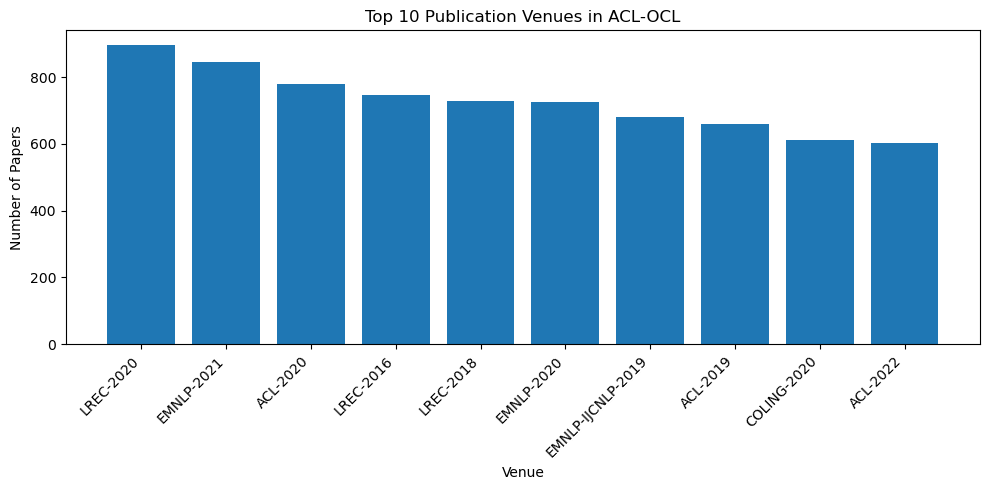

In [77]:
import matplotlib.pyplot as plt

# Define manual mapping
top_venue_map = {
    'Proceedings of the 12th Language Resources and Evaluation Conference': 'LREC-2020',
    'Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing': 'EMNLP-2021',
    'Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics': 'ACL-2020',
    "Proceedings of the Tenth International Conference on Language Resources and Evaluation ({LREC}'16)": 'LREC-2016',
    "Proceedings of the Eleventh International Conference on Language Resources and Evaluation ({LREC} 2018)": 'LREC-2018',
    'Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP)': 'EMNLP-2020',
    'Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics': 'ACL-2019',
    'Proceedings of the 28th International Conference on Computational Linguistics': 'COLING-2020',
    'Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)': 'ACL-2022',
    'Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing and the 9th International Joint Conference on Natural Language Processing (EMNLP-IJCNLP)': 'EMNLP-IJCNLP-2019',
}

top_venues = df_clean['booktitle'].value_counts().head(10)
abbreviated = [top_venue_map.get(v, v) for v in top_venues.index]

plt.figure(figsize=(10, 5))
plt.bar(abbreviated, top_venues.values)
plt.title('Top 10 Publication Venues in ACL-OCL')
plt.ylabel('Number of Papers')
plt.xlabel('Venue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


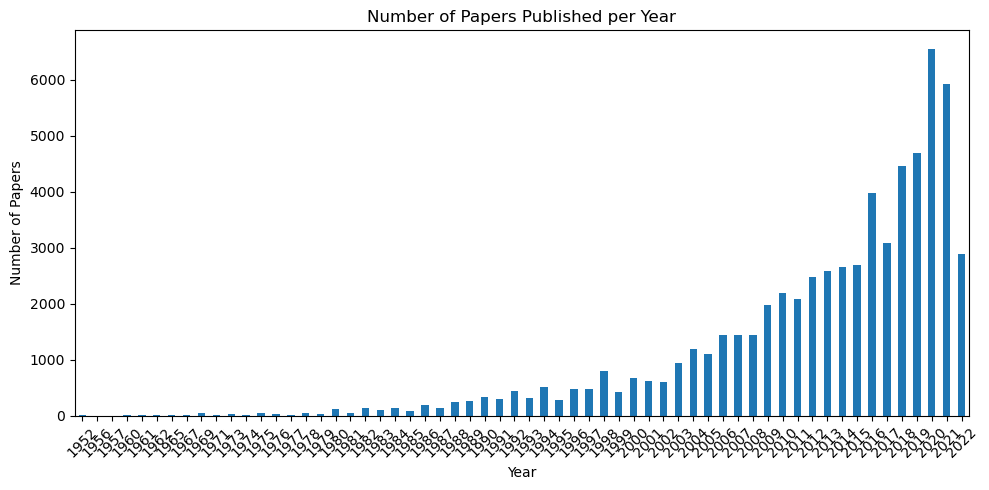

In [64]:
papers_per_year = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
papers_per_year.plot(kind='bar')
plt.title('Number of Papers Published per Year')
plt.ylabel('Number of Papers')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


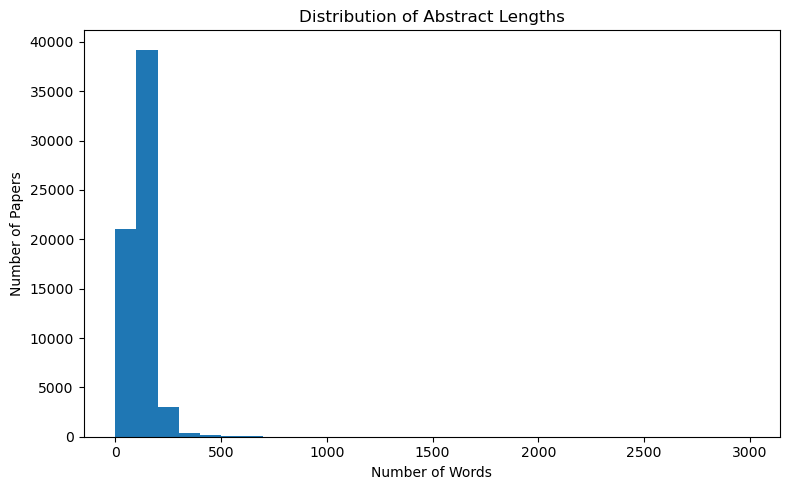

In [65]:
abstract_lengths = df_clean['abstract'].str.split().str.len()

plt.figure(figsize=(8, 5))
plt.hist(abstract_lengths, bins=30)
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_clean['abstract'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Get dominant topic per doc
doc_topic_dists = lda.transform(X)
df_clean['dominant_topic'] = doc_topic_dists.argmax(axis=1)



In [67]:
# Show top words per topic
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: " + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())

Topic 0: model neural models information propose network sentiment task based attention
Topic 1: parsing based paper task dependency parser grammar features syntactic tree
Topic 2: models model data training language performance learning tasks trained domain
Topic 3: la des et les en une le nous dans pour
Topic 4: language corpus annotation data paper languages research text present annotated
Topic 5: semantic paper discourse language structure linguistic information lexical syntactic analysis
Topic 6: translation machine english based mt language systems question paper quality
Topic 7: dialogue user human language systems users speech based paper dialog
Topic 8: task text evaluation news dataset results summarization paper information human
Topic 9: word words semantic based method using approach data results embeddings


In [68]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Define top keywords per topic
def get_topic_keywords(model, feature_names, n_top_words=10):
    topic_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_keywords.append(" ".join(top_features))
    return topic_keywords

topic_keywords = get_topic_keywords(lda, feature_names)

# Add readable labels to each document
df_clean['topic_keywords'] = df_clean['dominant_topic'].apply(lambda t: topic_keywords[t])

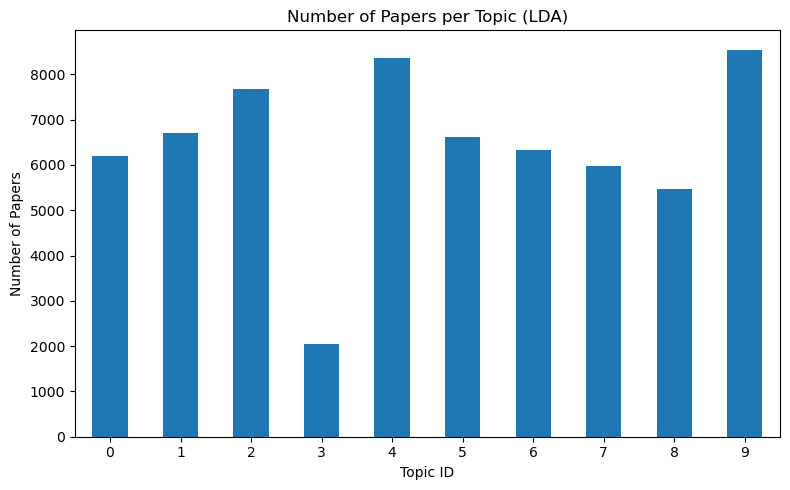

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Transform abstracts to topic distribution
topic_distributions = lda.transform(X)  # shape: [n_docs, n_topics]
dominant_topics = np.argmax(topic_distributions, axis=1)

# Count papers per topic
topic_counts = pd.Series(dominant_topics).value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
topic_counts.plot(kind='bar')
plt.xlabel("Topic ID")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Topic (LDA)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


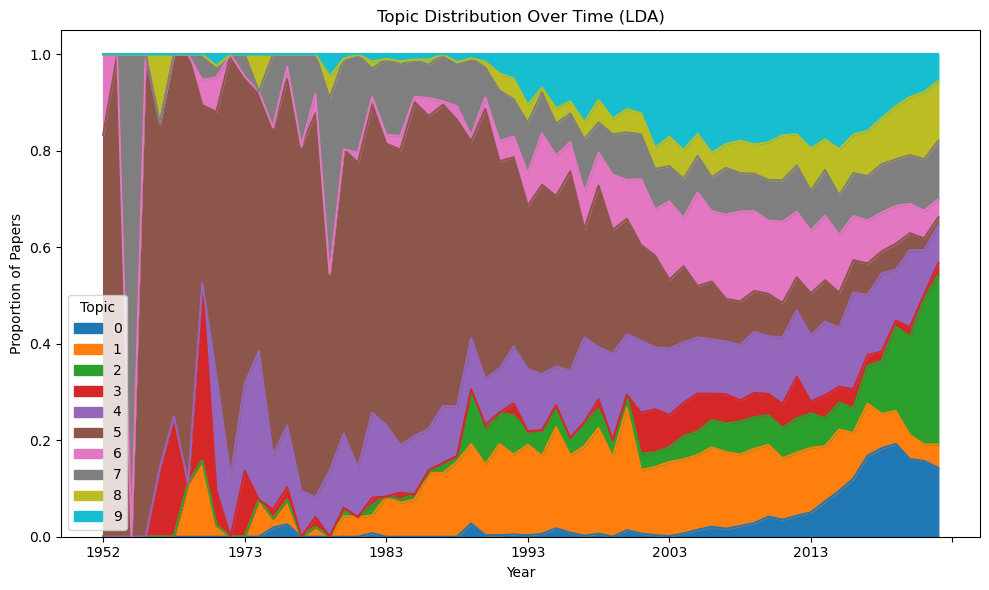

In [71]:
# Assuming you still have access to df['year'] corresponding to X
# Drop NaNs in abstracts and align years
abstracts = df_clean['abstract']
years = df_clean.loc[abstracts.index, 'year']

# Create DataFrame with topic and year
topic_df = pd.DataFrame({
    'year': years,
    'topic': dominant_topics
})
topic_df = topic_df.dropna()  # just in case some years are missing

# Count papers per topic per year
topic_year_counts = topic_df.groupby(['year', 'topic']).size().unstack(fill_value=0)

# Normalize to percentage
topic_year_percent = topic_year_counts.divide(topic_year_counts.sum(axis=1), axis=0)

# Plot
topic_year_percent.plot(kind='area', figsize=(10, 6), colormap='tab10')
plt.xlabel("Year")
plt.ylabel("Proportion of Papers")
plt.title("Topic Distribution Over Time (LDA)")
plt.legend(title='Topic')
plt.tight_layout()
plt.show()
